## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [7]:
import json
with open ("/Users/caolu/DASE-Homework/24autumn-Homework/hw4_data.json","r") as file :
    data = json.load(file)

network = {}
for edge in data['edges'] :
    user1, user2, weight = edge
    network.setdefault(user1, []).append((user2, weight))
    network.setdefault(user2, []).append((user1, weight))

print(network)  


{'Yanyan-Wang': [('Aarebecca', 25.3), ('pomelo-nwu', 25.09), ('yangzy0603', 11.85), ('tyn1998', 9.62), ('yvonneyx', 7.39), ('lidongze0629', 7.25), ('RackweLLizm', 4.5), ('yikenie', 4.25), ('yubo0923', 3.61), ('Maple0817', 3.11), ('wj23027', 2.34), ('frank-zsy', 2.1), ('andyhuang18', 1.14), ('bifenglin', 0.86)], 'Aarebecca': [('Yanyan-Wang', 25.3), ('pomelo-nwu', 24.84), ('yangzy0603', 11.92), ('yvonneyx', 7.73), ('lidongze0629', 6.58), ('tyn1998', 6.4), ('RackweLLizm', 4.84), ('yikenie', 4.55), ('yubo0923', 3.82), ('Maple0817', 3.27), ('frank-zsy', 0.97)], 'pomelo-nwu': [('Yanyan-Wang', 25.09), ('Aarebecca', 24.84), ('yangzy0603', 13.85), ('tyn1998', 12.48), ('lidongze0629', 8.1), ('yvonneyx', 7.63), ('RackweLLizm', 4.97), ('yikenie', 4.66), ('bifenglin', 4.11), ('frank-zsy', 3.96), ('yubo0923', 3.9), ('wj23027', 3.86), ('andyhuang18', 3.56), ('Maple0817', 3.32), ('will-ww', 3.27), ('zhicheng-ning', 2.52), ('PureNatural', 2.36), ('xiaoya-yaya', 2.24), ('xgdyp', 2.1), ('longyanz', 2.1),

In [8]:
direct_friends = {user: [friend[0] for friend in friends] for user, friends in network.items()}
print(direct_friends)  

{'Yanyan-Wang': ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin'], 'Aarebecca': ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy'], 'pomelo-nwu': ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975'], 'andyhuang18': ['tyn1998', 'wj23027', 'will-ww', 'zhicheng-ning', 'lhbvvvvv', 'frank-zsy', 'bifenglin', 'wxharry', 'Zzzzzhuzhiwei', 'stevending1st', 'PureNatural', 'pranavshuklaa', 'pomelo-nwu', 'stealth-bombeer', 'Vlad116', 'kunal8411', 'xgdyp', 'longyanz', 'xiaoya-yaya', 'zhaosj975', 'birdflyi', 'Yanya

In [9]:
counts = {user: len(friends) for user, friends in direct_friends.items()}
top_5_users = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_5_users)

[('tyn1998', 30), ('frank-zsy', 30), ('pomelo-nwu', 24), ('andyhuang18', 23), ('wj23027', 23)]


In [10]:
influence_scores = {node[0]: node[1] for node in data['nodes']}
top_5_influence_users = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_5_influence_users)

[('Yanyan-Wang', 50.95), ('Aarebecca', 23.82), ('pomelo-nwu', 22.36), ('tyn1998', 16.64), ('frank-zsy', 15.8)]


In [11]:
combined_influence = {user: 0.5 * influence_scores.get(user, 0) + 0.5 * counts.get(user, 0) for user in influence_scores}
top_combined_influence = sorted(combined_influence.items(), key=lambda x: x[1], reverse=True)[:5]
print(top_combined_influence)

[('Yanyan-Wang', 32.475), ('tyn1998', 23.32), ('pomelo-nwu', 23.18), ('frank-zsy', 22.9), ('Aarebecca', 17.41)]


找共同朋友数量最多的前五个

In [12]:
target_user = 'Yanyan-Wang'
friends_of_friends = {}
for friend in direct_friends[target_user]:
    for foaf, _ in network[friend]: 
        if foaf != target_user and foaf not in direct_friends[target_user]:
            friends_of_friends[foaf] = friends_of_friends.get(foaf, 0) + 1


recommended_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)
print(recommended_friends[:5])  

[('will-ww', 6), ('zhicheng-ning', 6), ('PureNatural', 6), ('xiaoya-yaya', 6), ('xgdyp', 6)]


In [13]:
strongest_connections = sorted(network[target_user], key=lambda x: x[1], reverse=True)[:5]
print(strongest_connections)


[('Aarebecca', 25.3), ('pomelo-nwu', 25.09), ('yangzy0603', 11.85), ('tyn1998', 9.62), ('yvonneyx', 7.39)]


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

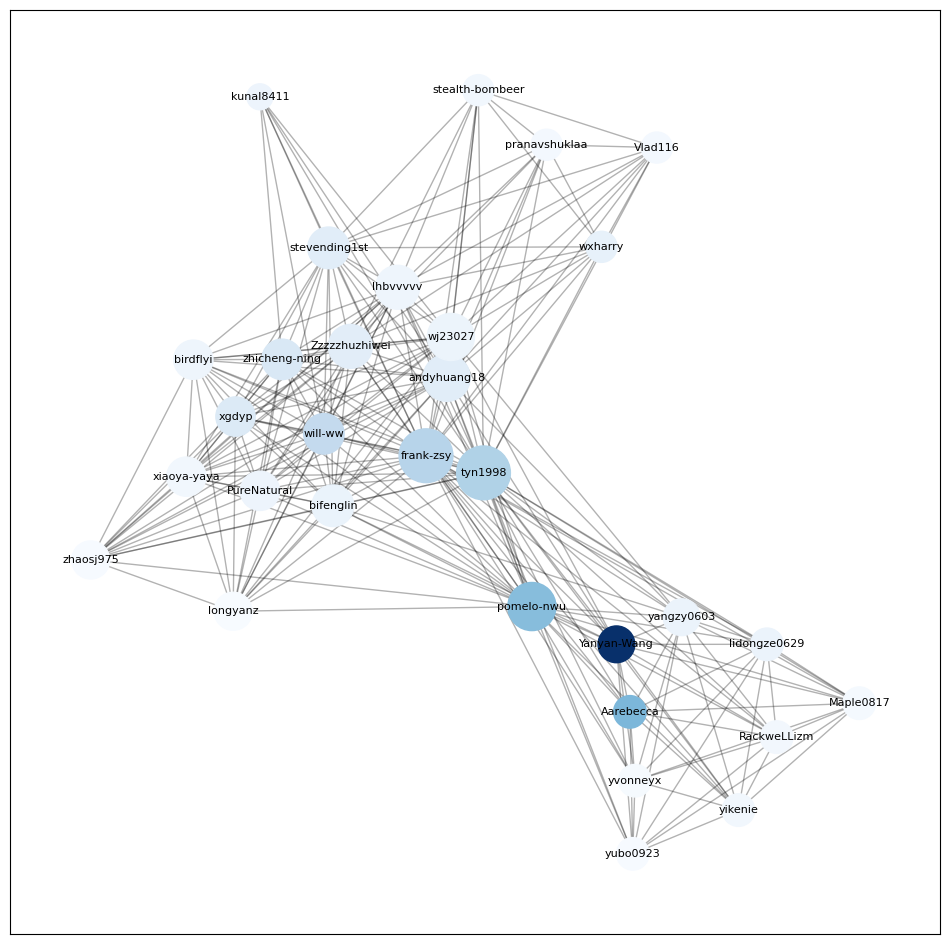

In [23]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()
for node in data['nodes']:
    G.add_node(node[0], influence=node[1])

for edge in data['edges']:
    G.add_edge(edge[0], edge[1], weight=edge[2])


plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)


influences = [G.nodes[node]['influence'] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=[counts.get(node, 1) * 50 for node in G], node_color=influences, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label="Influence Score")
plt.title("Social Network Visualization")
plt.show()
